In [1]:
import json
import os
import sys

In [2]:
filename = "/home/severine/MOOCS/UDACITY/DEEP_LEARNING/TP/P2_dog_classification/Transfer_Learning_Solution_copy.ipynb"
with open(filename) as f :
    notebook = json.load(f)

In [3]:
def find_output_marking(notebook, output_mark):
    for cell_idx,cell in enumerate(notebook["cells"]):
        if cell["cell_type"] == "code":
            for output in cell["outputs"]:
                if "text" in output :
                    found = False
                    for line in output["text"]:
                        if line.find(output_mark)!= -1:
                            #print("MARK FOUND !", cell_idx)
                            found = True
                    if found :
                        return output["text"]


In [4]:
output_mark = "Begin Training"
output_text = find_output_marking(notebook, output_mark)

In [5]:
import re
def tokenize_output(output_text):
    '''
    split notebook into tokens 
    separators : whitespace  ','  ':'
    '''
    res =[]
    for line in output_text :
    #    a = re.split(' |\n|:', line)
        #a = re.split('\s|:|,', line)
        # split outputs on whitespace, : and ,
        split_line = re.split('[\s|:|,]+', line)
        # remove empty tokens
        split_line = [ a for a in split_line if len(a)]
        #print(split_line)
        res.append(split_line)
    return res

In [6]:
split_lines = tokenize_output(output_text)

In [15]:
from collections import OrderedDict
def parse_nn_performances(split_lines):
    res = OrderedDict( )
    for line in split_lines:
        if 'VALID' in line :
            res.setdefault('VALID', OrderedDict())
            perf_type = 'VALID'
        elif 'TEST' in line :
            res.setdefault('TEST', OrderedDict())
            perf_type = 'TEST'            
        else :
            perf_type = 'TRAIN'
            res.setdefault('TRAIN', OrderedDict())
        if not 'Epoch' in line :
            print("not a result line")
            continue
        d_index = {}
        l_names = [ 'loss', 'accuracy', 'Epoch']
        d_type = {'loss':float, 'accuracy':float, 'Epoch':int }
        d_val = {}
        for name in l_names :
            d_index[name] = line.index(name)
        if d_index['loss'] == -1 and d_index['accuracy'] == -1 :
            print("error : not a performance line", line)
        else :
            try :
                for name, index in d_index.items():
                    if index > -1 :
                        d_val[name] = d_type[name](line[index+1])
            except ValueError :
                print("error conversion", name, index, line)
            else :
                epoch = d_val["Epoch"]
                del(d_val['Epoch'])
                for name, perf in d_val.items() :
                    res[perf_type].setdefault(name, OrderedDict() )
                    res[perf_type][name][ epoch] = perf

    return res
                      

In [8]:
res = parse_nn_performances(split_lines)

not a result line


In [9]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'loss')

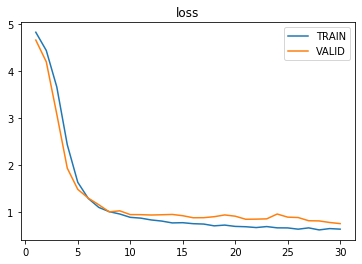

In [10]:
plt.plot()
plt.plot( list( res["TRAIN"]["loss"].keys()), list(res["TRAIN"]["loss"].values() ) , label ="TRAIN")
plt.plot( list( res["VALID"]["loss"].keys()), list(res["VALID"]["loss"].values() ) , label ="VALID")
plt.legend()
plt.title("loss")

Text(0.5, 1.0, 'accuracy')

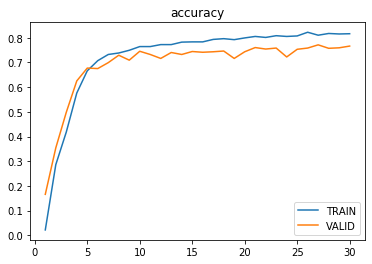

In [11]:
plt.plot()
plt.plot( list( res["TRAIN"]["accuracy"].keys()), list(res["TRAIN"]["accuracy"].values() ) , label ="TRAIN")
plt.plot( list( res["VALID"]["accuracy"].keys()), list(res["VALID"]["accuracy"].values() ) , label ="VALID")
plt.legend()
plt.title("accuracy")

In [13]:
test_output = find_output_marking(notebook, "TEST")

In [14]:
test_tokenized = tokenize_output(test_output)
print(test_tokenized)

[['TEST', 'Epoch', '30', 'loss', '0.8620', 'accuracy', '0.746']]


In [16]:
parse_nn_performances(test_tokenized)

OrderedDict([('TEST',
              OrderedDict([('loss', OrderedDict([(30, 0.862)])),
                           ('accuracy', OrderedDict([(30, 0.746)]))]))])

In [23]:
def extract_notebook_train_valid(notebook_name, l_markers = ["Begin Training", "TEST" ] ):
    with open(notebook_name) as f :
        notebook = json.load(f)
        res = OrderedDict()
        for output_mark in  l_markers :
            # find output cell beginning with output_mark
            output_text = find_output_marking(notebook, output_mark)
            if output_text :
                # tokenize output cell
                split_lines = tokenize_output(output_text)
                # extract results from cell
                dict_result = parse_nn_performances(split_lines)
                res.update(dict_result)
        return res

In [24]:
res = extract_notebook_train_valid(filename)

not a result line


In [26]:
for k, v in res.items() :
    print (k, v)

TRAIN OrderedDict([('loss', OrderedDict([(1, 4.824), (2, 4.4352), (3, 3.6599), (4, 2.428), (5, 1.6286), (6, 1.2845), (7, 1.0942), (8, 1.0033), (9, 0.9533), (10, 0.8824), (11, 0.8656), (12, 0.8268), (13, 0.8029), (14, 0.7636), (15, 0.7684), (16, 0.7472), (17, 0.7393), (18, 0.7013), (19, 0.7174), (20, 0.6894), (21, 0.6824), (22, 0.6649), (23, 0.6858), (24, 0.6587), (25, 0.6572), (26, 0.6303), (27, 0.6582), (28, 0.6146), (29, 0.643), (30, 0.6309)])), ('accuracy', OrderedDict([(1, 0.022), (2, 0.286), (3, 0.418), (4, 0.576), (5, 0.666), (6, 0.707), (7, 0.732), (8, 0.738), (9, 0.749), (10, 0.764), (11, 0.764), (12, 0.772), (13, 0.772), (14, 0.782), (15, 0.783), (16, 0.783), (17, 0.793), (18, 0.796), (19, 0.792), (20, 0.799), (21, 0.805), (22, 0.801), (23, 0.808), (24, 0.805), (25, 0.807), (26, 0.822), (27, 0.81), (28, 0.817), (29, 0.815), (30, 0.816)]))])
VALID OrderedDict([('loss', OrderedDict([(1, 4.6573), (2, 4.1937), (3, 3.0802), (4, 1.9298), (5, 1.4778), (6, 1.2921), (7, 1.1512), (8, 0.